# 3η Ασκηση


### A 

#### 1


<Axes: title={'center': 'Κατανομή του Review Count για Προϊόντα (ASIN)'}>

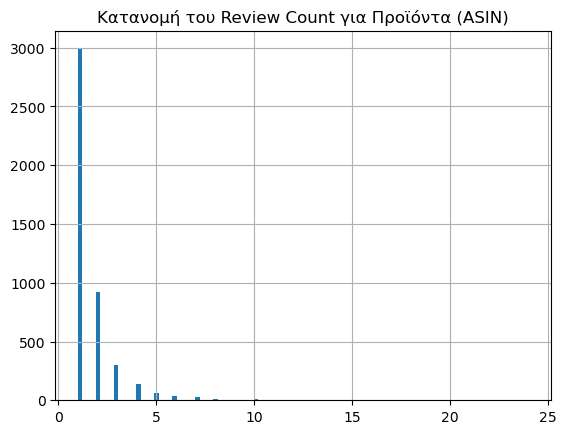

In [1]:
import json
import pandas as pd #The pandas library
from pandas import Series, DataFrame #Main pandas data structures
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import numpy as np
import seaborn as sns #A more fancy plotting library
df = pd.DataFrame(pd.read_csv(r'./Cell_Phones_meta.csv'))
df4=df
#df.dropna(inplace = True)
#print(df)

data = []
with open(r'./Cell_Phones_and_Accessories_5.json') as f:
    for line in f:
        data.append(json.loads(line))
df1=pd.DataFrame(data)
dfx=df1
df1.dropna(inplace = True)
#print(df1)
df2=df1.groupby('asin')['reviewerID'].nunique()
df2=DataFrame(df2)
#df3=df2.sort_values(by = 'reviewerID', ascending =False, inplace=False).head()

plt.title('Κατανομή του Review Count για Προϊόντα (ASIN)')
df2.reviewerID.hist(bins=100)
#plt.hist(df2['reviewerID'], bins=100)



Βλεπουμε πως τα πιο πολλα προιοντα εχουν μικρο αριθμο αξιολογησεων.Οσο αυξανονται τα reviews τοσο μειωνονται τα προιοντα.Μια σχεση αντιστροφη λογαριθμικη

#### 2

<Axes: xlabel='review count', ylabel='Count'>

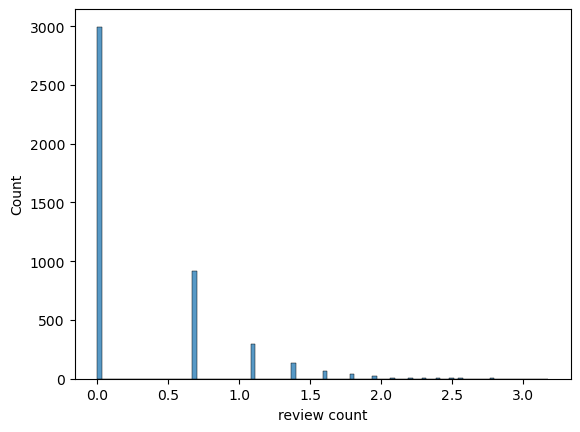

In [2]:
plt.figure()
plt.xlabel('review count')
sns.histplot(np.log(df2.reviewerID),bins=100 )


Βλεπουμε πως τα πιο πολλα προιοντα εχουν μικρο αριθμο αξιολογησεων.Οσο αυξανονται τα reviews τοσο μειωνονται τα προιοντα.Μια σχεση αντιστροφη λογαριθμικη

#### 3


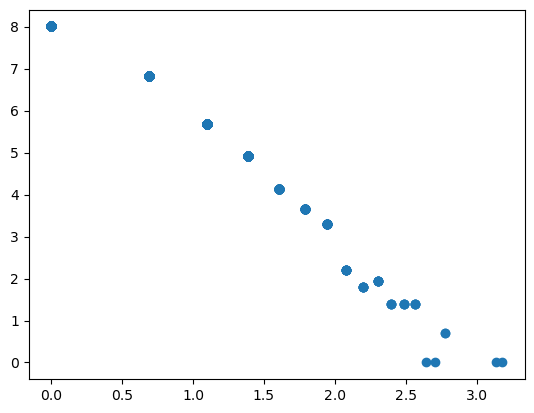

In [3]:
plt.figure()
df2['Frequency'] = df2.groupby('reviewerID')['reviewerID'].transform('count')

plt.scatter(np.log(df2.reviewerID),np.log(df2.Frequency))

Βλεπουμε ευθεια γραμη στο log-log plot. Αρα στο linear-linear εχουμε λογαριθμικ ησυσχετιση, κατι που φαινεται και απο τα προηγουμενα γραφηματα.

#### 4

<Axes: xlabel='log_reviewcount'>

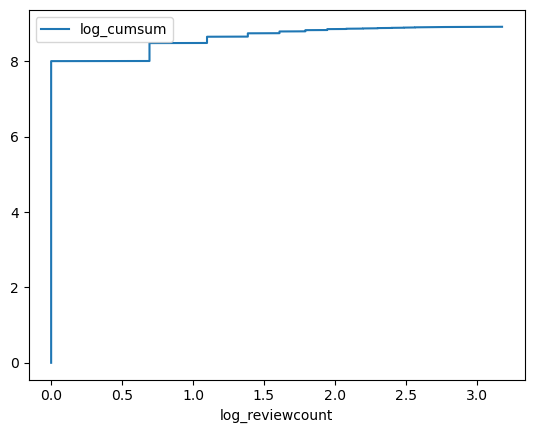

In [4]:
df2.sort_values(by='reviewerID', inplace=True)
df2['cumsum'] = df2.reviewerID.cumsum()

#(np.log(df2.reviewerID)).plot()
df2['log_cumsum'] = np.log(df2['cumsum'])
df2['log_reviewcount'] = np.log(df2['reviewerID'])
df2.plot(y='log_cumsum', x='log_reviewcount')
#(np.log(df2.cumsum)).plot()
#plt.scatter( df2.reviewerID,df2.asin, color='blue')
#plt.title('Scatter Plot of Review Count for Each ASIN')
#plt.xlabel('ASIN')
#plt.ylabel('Number of Unique ReviewerIDs')
#plt.show()
#cumulative_freqcuency_vector=df2.cumsum()
#plt.figure()
#df2.plot()


#### 5

            reviewerID  Frequency  cumsum  log_cumsum  log_reviewcount  rank  \
asin                                                                           
B0000DIDAH           1       2995       1    0.000000         0.000000  18.0   
B0154QEV9A           1       2995       2    0.693147         0.000000  18.0   
B0154TCYL4           1       2995       3    1.098612         0.000000  18.0   
B01553N3HS           1       2995       4    1.386294         0.000000  18.0   
B0155UA4DM           1       2995       5    1.609438         0.000000  18.0   
...                ...        ...     ...         ...              ...   ...   
B01CDVZAH6          15          1    7372    8.905444         2.708050   4.0   
B013H1EPXG          16          2    7388    8.907612         2.772589   3.0   
B00I608BHU          16          2    7404    8.909776         2.772589   3.0   
B018JW3EOY          23          1    7427    8.912877         3.135494   2.0   
B00P7N0320          24          1    745

<Axes: xlabel='log_rank'>

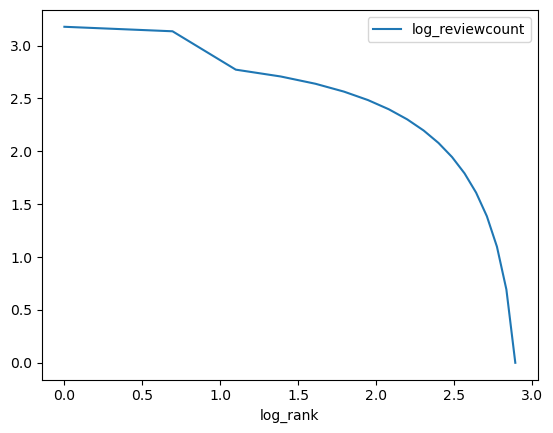

In [5]:
df2['rank'] = df2['reviewerID'].rank(ascending=False, method='dense')
df2['log_rank'] = np.log(df2['rank'])
print(df2)


df2.plot(y='log_reviewcount', x='log_rank')

Λογικο γραφημα.Βλεπουμε πως οταν μειωνεται η συχνοτητα οτυ αριθμου των reviews , αυξανεται ο βαθμος.

###### 

Text(0.5, 0, 'review count')

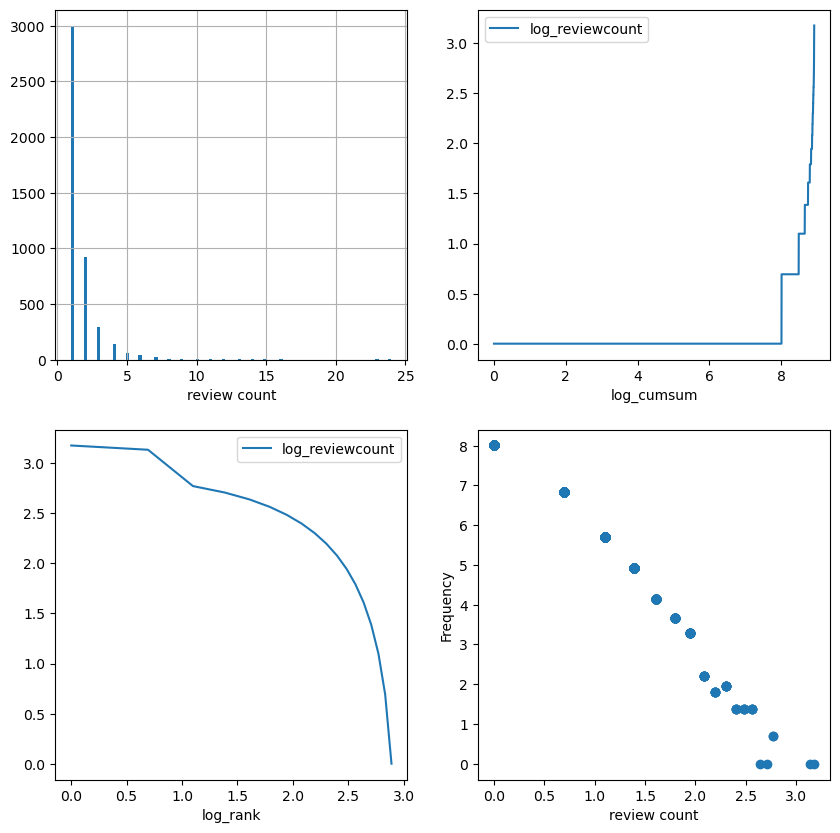

In [6]:
fig, ax = plt.subplots(2, 2,figsize=(10,10))

df2.reviewerID.hist(bins=100,ax=ax[0][0])



df2.plot(y='log_reviewcount', x='log_cumsum',ax=ax[0][1])
plt.scatter(x=np.log(df2.reviewerID),y=np.log(df2.Frequency))

df2.plot(y='log_reviewcount', x='log_rank',ax=ax[1][0])

ax[0][0].set_xlabel('review count')
ax[1][1].set_ylabel('Frequency')
ax[1][1].set_xlabel('review count')


## B


<Axes: xlabel='months_since_first_review', ylabel='average_rating'>

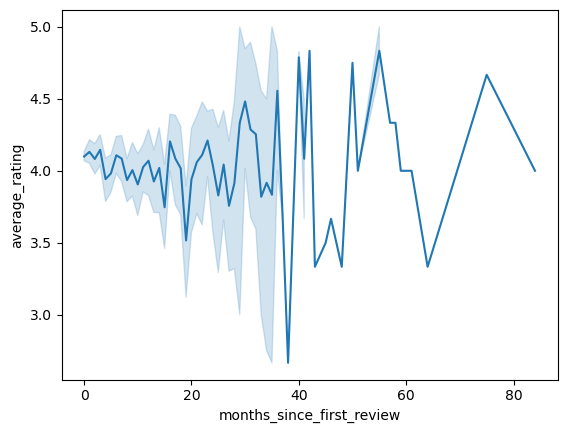

In [7]:
import math
df3=pd.DataFrame(dfx)
df3['unixReviewTime'] = pd.to_datetime(df3['unixReviewTime'], unit='s')  # Convert to datetime if not already
df3=DataFrame(df3)

df3=df3.sort_values(by = 'unixReviewTime', ascending =True, inplace=False)
df3['months_since_first_review'] = df3.groupby('asin')['unixReviewTime'].transform(lambda x: np.floor((x - x.min()) / np.timedelta64(1, 'M')))
#df3['months_since_first_review'] = df3['unixReviewTime'].apply(lambda x: np.floor((x - df3.iloc[0]['unixReviewTime']) / np.timedelta64(1, 'M')))
#df3['month'] = df3['unixReviewTime'].dt.month
#df3 = df3[df3['months_since_first_review'] <= 51]
df3['average_rating'] = df3.groupby('asin')['overall'].transform('mean')

df3=df3.sort_values(by = 'months_since_first_review', ascending =True, inplace=False)
#print(df3)
sns.lineplot(x='months_since_first_review', y = 'average_rating', data = df3, errorbar=('ci', 95))



Απο το διαγραμμα βλεπουμ πωςτα προιοντα αν και παρουσιαζουν απο μια σχετικα μεγαλη αξιολογιση στην αρχη, με την παροδο των μηνων αφου τεσταριστουν απο τους χρηστες, αποκτουν μεγαλυτερο ευρως τιμων προσσεγιζοντας το καθενα μια πιο αντικειμενικη αξιολογηση.

## Γ

In [8]:
df=df.dropna(subset="price")
df3=df3.sort_values(by = 'months_since_first_review', ascending =True, inplace=False)
df = df[~df['price'].str.contains('background', case=False, na=False)]
df['price'] = df['price'].str[1:]
df['price'] = df.groupby('asin')['price'].transform('min')
#print(dfx)
dfx['average_rating'] = dfx.groupby('asin')['overall'].transform('mean')
#print(dfx.average_rating)

In [9]:
df_merged = pd.merge(df, dfx, on='asin')

#print(df.dtypes)
#sns.lineplot(x='price', y = 'overall', data = df3, errorbar=('ci', 95))
#print(df_merged)
#print(dfx)
df_merged = df_merged.sort_values(by='price', ascending=True, inplace=False)
#print(df_merged.price)
unique_prices = df_merged['price'].tolist()
#print(unique_prices)



#df_merged['price'] =df_merged.price.convert_dtypes(convert_floating=True)
df_merged['price'] = df_merged['price'].astype('float64')

#df_merged=df_merged.dropna(subset="price")
#df_merged=df_merged.dropna(subset="price")
#print(df.dtypes)
#print(df_merged['price'] )
df_merged = df_merged.sort_values(by='price', ascending=False, inplace=False)
#print(df_merged.price)

#sns.lineplot(x='price', y = 'average_rating', data = df_merged, errorbar=('ci', 95))
#plt.figure()
df_merged=df_merged.sort_values(by = 'price', ascending =True, inplace=False)
#df_merged.price.hist(bins=100)

Pearson Correlation Coefficient: -0.017208159446653874


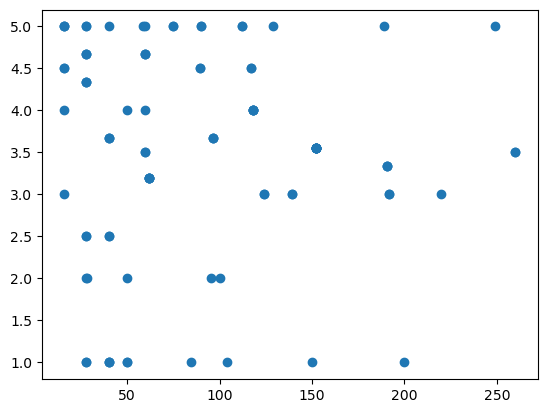

In [10]:
plt.scatter(df_merged['price'], df_merged['average_rating'])
correlation_coefficient = df_merged['average_rating'].corr(df_merged['price'], method='pearson')

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Απο το διαγραμμα , ειναι σχετικα δυσκολο να εξαγουμε το συμπερασμα «Όσο πιο ακριβό είναι ένα προϊόν
τόσο καλύτερο το μέσο rating του».Μαλιστα φαινεται σαν να μην υπαραχει καποια τετοια συσχετιση.
Κοιταζοντας και το Pearson Correlation Coefficient: -0.017208159446653874 να ειναι αρκετα μικρο, μπορουμε με ασφαλεια να υποθεσουμε πως για τα δεδωμενα μας, η υποθεση μας , ειναι λανθασμενη.

## Δ 



T-statistic: -1.120914453991763e+16
P-value: 0.0
---------------
T-statistic: inf
P-value: 0.0
---------------
T-statistic: 6846010494570646.0
P-value: 0.0
---------------
T-statistic: nan
P-value: nan
---------------
T-statistic: inf
P-value: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


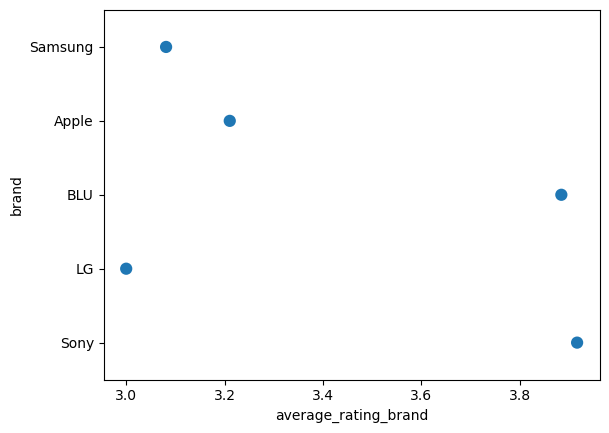

In [11]:
df_merged = pd.merge(df4, dfx, on='asin')
df_merged['average_rating_brand'] = df_merged.groupby('brand')['average_rating'].transform('mean')
#print(df_merged.overall)
df_merged['numOfproducts'] = df_merged.groupby('brand')['asin'].transform('nunique')

# we calculate the numOfproducts for each brand
df_merged['numOfproducts'] = df_merged.groupby('brand')['asin'].transform('nunique')

# we get the top 5 brands based on numOfproducts
top5_brands = df_merged.groupby('brand')['numOfproducts'].max().nlargest(5).index

# we keep only the rows for the top 5 brands
df_top5 = df_merged[df_merged['brand'].isin(top5_brands)]

#print(df_top5.average_rating_brand)
sns.pointplot(x='average_rating_brand',y='brand', data = df_top5,join = False, errorbar=('ci', 95))
from scipy.stats import ttest_ind

brand_a_ratings = df_top5[df_top5['brand'] == 'Samsung']['average_rating_brand']
brand_b_ratings = df_top5[df_top5['brand'] == 'Sony']['average_rating_brand']

t_stat, p_value = ttest_ind(brand_a_ratings, brand_b_ratings)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("---------------") 
brand_a_ratings = df_top5[df_top5['brand'] == 'Apple']['average_rating_brand']
brand_b_ratings = df_top5[df_top5['brand'] == 'LG']['average_rating_brand']

t_stat, p_value = ttest_ind(brand_a_ratings, brand_b_ratings)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("---------------") 
brand_a_ratings = df_top5[df_top5['brand'] == 'Sony']['average_rating_brand']
brand_b_ratings = df_top5[df_top5['brand'] == 'LG']['average_rating_brand']

t_stat, p_value = ttest_ind(brand_a_ratings, brand_b_ratings)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


print("---------------") 
brand_a_ratings = df_top5[df_top5['brand'] == 'Sasmung']['average_rating_brand']
brand_b_ratings = df_top5[df_top5['brand'] == 'LG']['average_rating_brand']

t_stat, p_value = ttest_ind(brand_a_ratings, brand_b_ratings)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


print("---------------") 
brand_a_ratings = df_top5[df_top5['brand'] == 'BLU']['average_rating_brand']
brand_b_ratings = df_top5[df_top5['brand'] == 'LG']['average_rating_brand']

t_stat, p_value = ttest_ind(brand_a_ratings, brand_b_ratings)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Απο το διαγραμα, δυσκολευομαστε να βρουμε αν υπαρχει σοβαρη διαφορα στις αξιολογησεις αναλογα με το brand.
Παιρνοντας τα t-tests, βλεπονατας το Τ-statistic βλεπουμε πως τα δεδωμενα ειναι  παρομοια και πως πιθανο να υπαρχει υπολογιστικο λαθος.Αρα  δεν υπαρχει σοβαρη διαφορα στις αξιολογησεις αναλογα με το brand.

## E

Pearson Correlation Coefficient: 0.2414998178071095
Pearson Correlation Coefficient: 0.2130933360574861


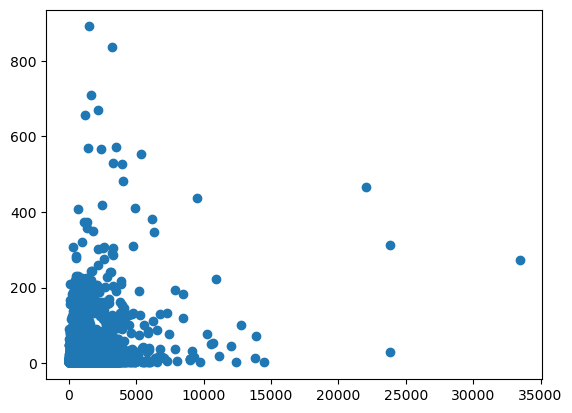

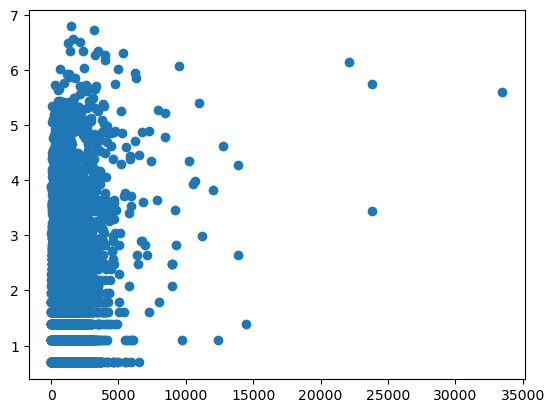

In [12]:
dfx['reviewLength']=(dfx['reviewText'].str.len())
dfx['vote'] = pd.to_numeric(dfx['vote'], errors='coerce')
dfx['log_vote'] = (np.log(dfx.vote))

dfx = dfx[dfx['vote'] > 0]
correlation_coefficient = dfx['vote'].corr(dfx['reviewLength'], method='pearson')

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
plt.figure()
plt.scatter(dfx['reviewLength'], dfx['vote'])
log_correlation_coefficient = dfx['log_vote'].corr(dfx['reviewLength'], method='pearson')

plt.figure()

plt.scatter(dfx['reviewLength'], dfx['log_vote'])
print(f"Pearson Correlation Coefficient: {log_correlation_coefficient}")

Στα διαγραμματα,βλεπουμε οτι τα πιο βοηθητικα σχολεια βρισκοντα μεταξυ 0 και 5000 χαρακτηρες.Αν και βλεπουμε πως δεν υπαρχουν αρκετα reviews με μεγαλο μεγεθος και μικρη αξιολογηση δεν μπορουμε να εξαγουμε καποιο βεβαιο συμπερασμα.Η συσχετιση ειναι και υπαρχει 
Απο το μικρο αλλα οχι μηδαμινο Pearson Correlation Coefficient , βλεπουμε πως υπαρχει μια μικρη συσχετιση μεταξυ του μηκους της αξιολογησης και το ποσο βοηθητικη θεωρηθηκε, αλλα αυτη η συσχετιση ειναι αδυναμη!

## Z


T-statistic: -20.45504024592988
P-value: 1.583421850069953e-90


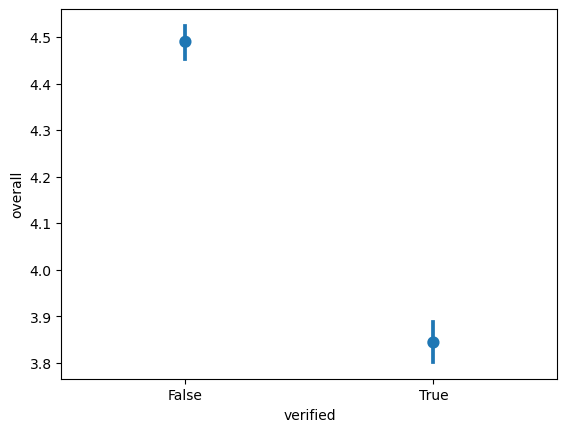

In [13]:
plt.figure()
#print(dfx)
#print(dfx.dtypes)
sns.pointplot(x='verified',y='overall', data = dfx,join = False, errorbar=('ci', 95))
brand_a_ratings = dfx[dfx['verified'] == 1]['overall']
brand_b_ratings = dfx[dfx['verified'] == 0]['overall']

t_stat, p_value = ttest_ind(brand_a_ratings, brand_b_ratings)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Βλεποντας το διαγραμμα, παρατηρουμε μια αξιολογη διαφορα μεταξη των verified και των unverified reveiws.
Τα verified reviews φαινονται ναεχουν μια πιο μεση αξιολογηση σε σχεση με τα unverified που τηνουν προς το ανω ακρο της βαθμολογικης κλιμακας.Αυτο θα μπορουσε να υποδηλωνει πιθανη προσπαθια χειρισμου των αξιολογησεων απο τις εταιριες με unverified reviews.Τα t-tests επιβεβαιωνουν αυτο που βλεπουμε με P-value πολυ μικρο, αρα το αποτελεσμα δεν ειναι τυχαιο, και μεγαλο T-statistic, αρα η διαφορα μεταξυ των τιμων, ειναι αξιολογη.

# H 

Θα εξετασουμε την εξης υποθεση : Οσο πιο πολλες αξιολογησεις εχει ενα προιον, τοσο καλυτερη η βαθμολογια του.


Pearson Correlation Coefficient: 0.041887221478370436


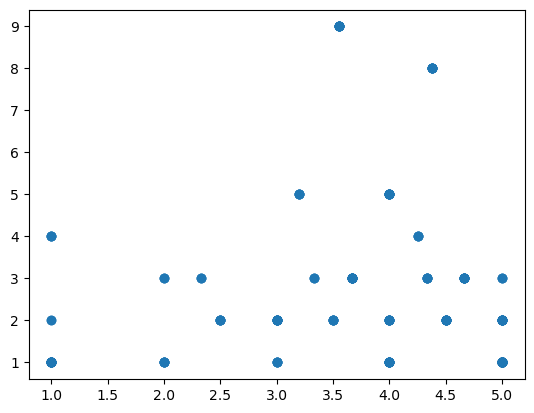

In [14]:
#print(df_merged.average_rating)
df_merged['review_count']=df_merged.groupby('asin')['reviewerID'].transform('nunique')
#print(df_merged.review_count.min())

plt.figure()


correlation_coefficient = df_merged['average_rating'].corr(df_merged['review_count'], method='pearson')

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
plt.scatter(df_merged.average_rating,df_merged.review_count)

Με το ματι, δεν παρατηρουμε καποια ξεκαθαρη σχεση μεταξυ του αριθμου των reviews και της βαθμολογιας του προιοντος.
Κοιταζοντας και το  Pearson Correlation Coefficient: 0.041887221478370436, το οποιο ειναι ιδιαιτερα χαμηλο, μπορουμε με ασφαλεια, να απορριψουμε την υποθεση για τα δεδομενα μας.

#### Δεν ξερω αν εχω κανει καποιο λαθος στις προσεγγισεις μου.Συνενωνοντας τα 2 dataframes απο τα 2 αρχεια ως προς το 'asin' , συνειδητοποιησα, οτι  μειωνεται κατα πολυ ο αριθμος των rows.Οποτε μπορει να εχω κανει κατι λαθως.Σε σχολια , ειναι διαφορες εκτυπωςσεις/ διαγραμματα που εκανα για να δω καλυτερα τα δεδωμενα.

